# Epistemic Uncertainty Quantification

Created by Jian-Ren Lim (jlim6@nd.edu)

These examples and codes were adapted from:

Nadim Kawwa, Statistic datasets and experiments. https://github.com/NadimKawwa/Statistics

Scipy.org, scipy.stats.ks_2samp. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

McClarren, Ryan G (2018). Uncertainty Quantification and Predictive Computational Science: A Foundation for Physical Scientists and Engineers, Chapter 12, Epistemic Uncertainties: Dealing with a Lack of Knowledge, Springer,  https://link.springer.com/chapter/10.1007/978-3-319-99525-0_12

## $\delta_n$ in Probability Box  (P-box)

A p-box is used to express simultaneously incertitude (epistemic uncertainty), which is represented by the breadth between the left and right edges of the p-box, and variability (aleatory uncertainty), which is represented by the overall slant of the p-box.

The KS test statistic δN is the maximum vertical distance between the true (but
unknown) CDF, F(x), and the empirical CDF derived from N samples, FN(x):

$$\delta_n = sup |F_N(x) - F(x)|$$

If our maximum difference is less than $\delta_{critical}$ we fail to reject the null hypothesis. The critical value at 95% is approximated by:

$$\delta_{critical} = \frac{1.3581}{\sqrt{N}}$$

Suppose we have n observations x1, x2, ...xn that we think come from a distribution P. The KS test is used to evaluate:
- Null Hypothesis: The samples do indeed come from P
- Alternative Hypothesis: The amples do not come from P

To build intution for the KS test, we take a step back and consider descriptive statistics. Distributions sucha s the normal distribution are known to have a mean of 0 and a standard deviation of 1. Therefore we expect no more than 15% of the data to lie below the mean.

In this task we will use the Cumulative Distribution Function (CDF). More specifically, we will use the Empirical Distribution Function (EDF): an estimate of the cumulative distribution function that generated the points in the sample.

## Example 1: KS Test on Distributions of the Same Mean

The cumulative distribution function uniquely characterizes a probability distribution.
We want to compare the empirical distribution function of the data, **F_obs**, with the cumulative distribution function , **F_exp** (expected CDF).

In the first example we want to compare the empirical distribution function of the observed data, with the cumulative distribution function associated with the null hypothesis (normal distribution).


In [1]:
## import all needed Python libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as st

%matplotlib inline

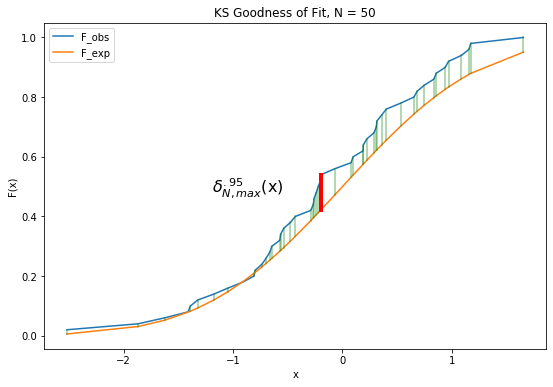

Avg_d =  0.0545044709926502 	Max_d =  0.11764065524564571
d_critical =  0.19206434390589006


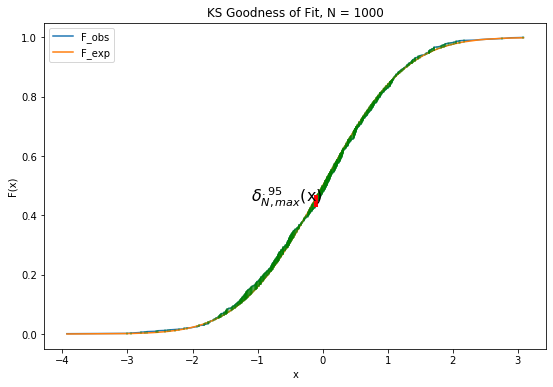

Avg_d =  0.012485125221207642 	Max_d =  0.026409542323946322
d_critical =  0.04294689290274677


In [2]:
#generate random aray
for size in [50,1000]:
    arr_1 = np.random.normal(0, 1, size)
    arr_1_edf = np.arange(1/len(arr_1), 1+1/len(arr_1), 1/len(arr_1))
    delta = []

    #sort
    arr_1_sorted = np.sort(arr_1)
    cdf_null_hyp = [st.norm.cdf(x) for x in arr_1_sorted]
    #calculate absolute difference
    plt.figure(figsize=(9, 6))
    plt.plot(arr_1_sorted, arr_1_edf,'C0', label='F_obs')
    plt.plot(arr_1_sorted, cdf_null_hyp,'C1', label='F_exp')
    max=[0,0,0,0]
    for x, y1, y2 in zip(arr_1_sorted, arr_1_edf, cdf_null_hyp):
        plt.plot([x, x], [y1, y2], color='green', alpha=0.4)
        delta.append(y2-y1)
        if np.abs(y2-y1) > max[3]:
            max=[x,y1,y2,np.abs(y2-y1)]

    plt.plot([max[0],max[0]], [max[1], max[2]],'r', lw=4)
    plt.text(max[0]-1,(max[1]+max[2])/2,'$\delta^{.95}_{N,max}$(x)', fontsize=16)
    plt.legend()
    plt.ylabel("F(x)")
    plt.xlabel('x')
    plt.title(f"KS Goodness of Fit, N = {size}")
    plt.show()

    print('Avg_d = ',np.average(np.abs(delta)),'\tMax_d = ', np.max(np.abs(delta)))
    d_critical = 1.3581/np.sqrt(size)
    print('d_critical = ',d_critical)



Observation: Larger number of measurements (N=1000) show that $\delta_{max}$ < $\delta_{critical}$, therefore we fail to reject the null hypothesis (i.e. the samples do indeed come from P).

## Example 2: Distributions of Different Means


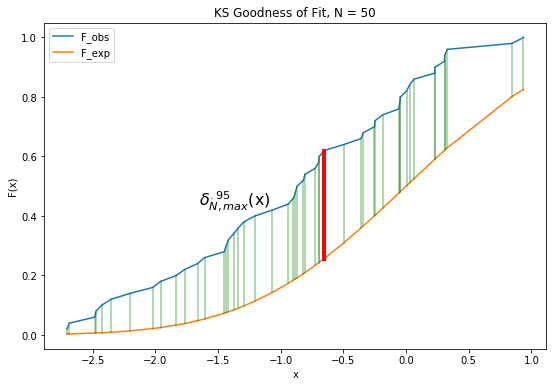

Avg_d =  0.24830195602735336 	Max_d =  0.36317504134452633
d_critical =  0.19206434390589006


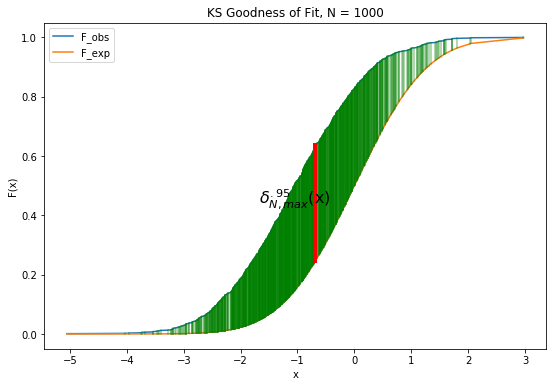

Avg_d =  0.25772425958322526 	Max_d =  0.38970027967277737
d_critical =  0.04294689290274677


In [3]:
#generate random aray
for size in [50,1000]:
    arr_1 = np.random.normal(-1, 1, size)
    arr_1_edf = np.arange(1/len(arr_1), 1+1/len(arr_1), 1/len(arr_1))
    delta = []

    #sort
    arr_1_sorted = np.sort(arr_1)
    cdf_null_hyp = [st.norm.cdf(x) for x in arr_1_sorted]
    #calculate absolute difference
    plt.figure(figsize=(9, 6))
    plt.plot(arr_1_sorted, arr_1_edf,'C0', label='F_obs')
    plt.plot(arr_1_sorted, cdf_null_hyp,'C1', label='F_exp')
    max=[0,0,0,0]
    for x, y1, y2 in zip(arr_1_sorted, arr_1_edf, cdf_null_hyp):
        plt.plot([x, x], [y1, y2], color='green', alpha=0.4)
        delta.append(y2-y1)
        if np.abs(y2-y1) > max[3]:
            max=[x,y1,y2,np.abs(y2-y1)]

    plt.plot([max[0],max[0]], [max[1], max[2]],'r', lw=4)
    plt.text(max[0]-1,(max[1]+max[2])/2,'$\delta^{.95}_{N,max}$(x)', fontsize=16)
    plt.legend()
    plt.ylabel("F(x)")
    plt.xlabel('x')
    plt.title(f"KS Goodness of Fit, N = {size}")
    plt.show()

    print('Avg_d = ',np.average(np.abs(delta)),'\tMax_d = ', np.max(np.abs(delta)))
    d_critical = 1.3581/np.sqrt(size)
    print('d_critical = ',d_critical)



Observation: Both measurements show that $\delta_{max}$ > $\delta_{critical}$, therefore we can reject the null hypothesis (i.e. the samples do not come from P).

## Example 3: Distributions of Different Mean and Standard Deviation

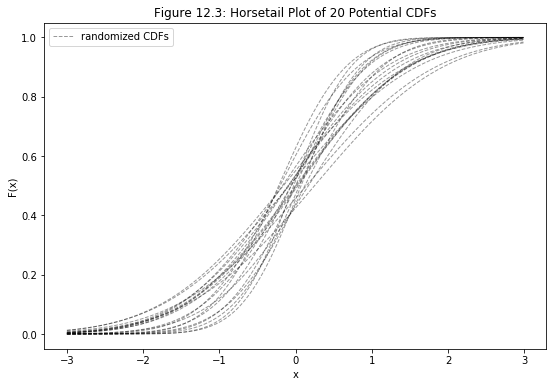

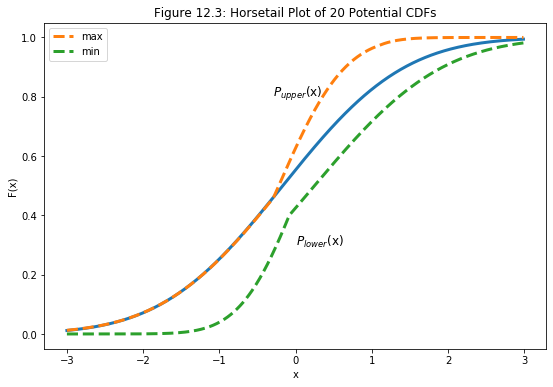

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
r = np.arange(-3,3,.01)
min=[1 for _ in range(len(r))]; max=[0 for _ in range(len(r))]
plt.figure(figsize=(9, 6))

for _ in range(20):
    a = random.uniform(-0.25,0.25);
    b = random.uniform(0.55,1.45);
    plt.plot(r, norm.cdf(r, a, b),'k--',lw=1,alpha=0.4)
    for i in range(len(r)):
        if norm.cdf(r, a, b)[i] < min[i]: 
            min[i] = norm.cdf(r, a, b)[i]
        elif norm.cdf(r, a, b)[i] > max[i]: 
            max[i] = norm.cdf(r, a, b)[i]
plt.title('Figure 12.3: Horsetail Plot of 20 Potential CDFs')
plt.ylabel('F(x)')
plt.xlabel('x')
plt.legend(['randomized CDFs'])
plt.show()

plt.figure(figsize=(9, 6))
plt.plot(r, norm.cdf(r, -0.168, 1.25),lw=3)
plt.plot(r, max,'C1--',label='max',lw=3)
plt.plot(r, min,'C2--',label='min',lw=3)
plt.title('Figure 12.3: Horsetail Plot of 20 Potential CDFs')
plt.text(-0.3,0.8,'$P_{upper}$(x)', fontsize=12)
plt.text(0,0.3,'$P_{lower}$(x)', fontsize=12)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.legend()
plt.show()


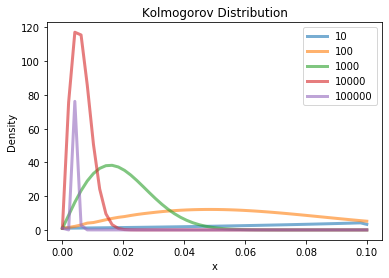

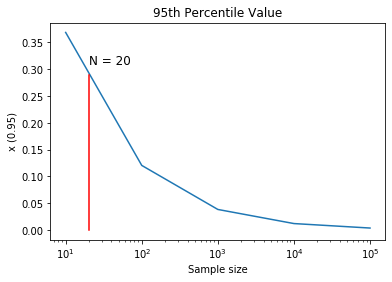

In [5]:
from scipy.stats import ksone
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,0.1)
for n in [10,100,1000,10000,100000]:
    plt.plot(x, ksone.pdf(x, n), lw=3, alpha=0.6,label=str(n))
plt.title('Kolmogorov Distribution')
plt.ylabel('Density')
plt.xlabel('x')
plt.legend()
plt.show()
a=[]
for n in [10,100,1000,10000,100000]:
    a.append(ksone.ppf(0.95, n))
plt.plot([10,100,1000,10000,100000],a)
plt.plot([20,20],[0,0.29],'r')
plt.text(20,0.31,'N = 20', fontsize=12)
plt.xscale('log')
plt.title('95th Percentile Value')
plt.ylabel('x (0.95)')
plt.xlabel('Sample size')
plt.show()

95th percentile =  0.2647335873372445


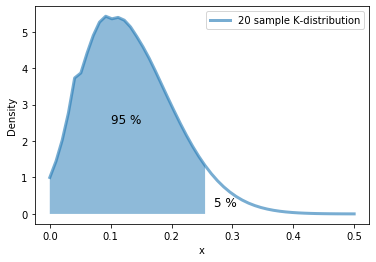

In [6]:
from scipy.stats import ksone
import matplotlib.pyplot as plt
import numpy as np

N=20
x = np.linspace(0,.5)
plt.plot(x, ksone.pdf(x, N), lw=3, alpha=0.6,label='20 sample K-distribution')
a=ksone.ppf(.95,N)
print('95th percentile = ',a)
z=x[x<a]
plt.fill_between(z, ksone.pdf(z, N),  alpha=0.5)
plt.text(.1,2.5,'95 %', fontsize=12)
plt.text(.27,.2,'5 %', fontsize=12)
plt.ylabel('Density')
plt.xlabel('x')
plt.legend()
plt.show()

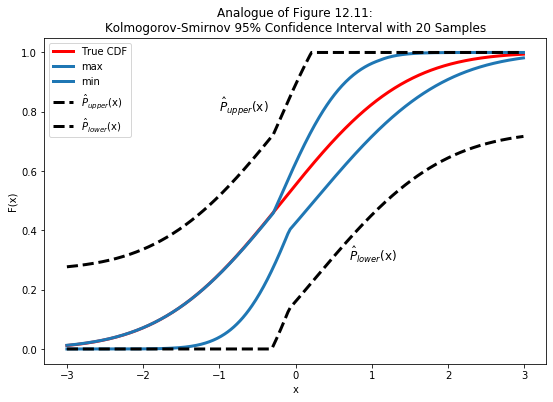

In [7]:
p_hat_up=[]
for i in range(len(max)):
    b=max[i]+a
    if b > 1:
        p_hat_up.append(1)
    else:
        p_hat_up.append(b)
p_hat_down=[]
for i in range(len(max)):
    b=min[i]-a
    if b < 0:
        p_hat_down.append(0)
    else:
        p_hat_down.append(b)

plt.figure(figsize=(9, 6))
plt.plot(r, norm.cdf(r, -0.168, 1.25),'r',lw=3,label='True CDF')
plt.plot(r, max,'C0-',label='max',lw=3)
plt.plot(r, min,'C0-',label='min',lw=3)
plt.plot(r, p_hat_up,'k--',label='$\hat{P}_{upper}$(x)',lw=3)
plt.plot(r, p_hat_down,'k--',label='$\hat{P}_{lower}$(x)',lw=3)
plt.title('Analogue of Figure 12.11:\nKolmogorov-Smirnov 95% Confidence Interval with 20 Samples')
plt.text(-1,0.8,'$\hat{P}_{upper}$(x)', fontsize=12)
plt.text(0.7,0.3,'$\hat{P}_{lower}$(x)', fontsize=12)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.legend()
plt.show()